<img src="https://5264302.fs1.hubspotusercontent-na1.net/hubfs/5264302/Demo%20Asset%20Resources/CM-Demo-options_exploration-Cover.png" width=1100 margin-left='auto' margin-right='auto'/>

Options contracts have become an increasingly liquid segment of crypytoasset derivatives. Coin Metrics currently offers options data through various endpoints in our Market Data Feed offering. Available endpoints include market greeks, implied volatility, contract prices, market quotes, open interest, and more. 

## Resources
This notebook demonstrates basic functionality offered by the Coin Metrics Python API Client and Market Data Feed.

Coin Metrics offers a vast assortment of data for hundreds of cryptoassets. The Python API Client allows for easy access to this data using Python without needing to create your own wrappers using `requests` and other such libraries.

To understand the data that Coin Metrics offers, feel free to peruse the resources below.

- The [Coin Metrics API v4](https://docs.coinmetrics.io/api/v4) website contains the full set of endpoints and data offered by Coin Metrics.
- The [Coin Metrics Product Documentation](https://docs.coinmetrics.io/info) gives detailed, conceptual explanations of the data that Coin Metrics offers.
- The [API Spec](https://coinmetrics.github.io/api-client-python/site/api_client.html) contains a full list of functions.

# Notebook Setup

In [44]:
from os import environ
import pandas as pd
import numpy as np
import seaborn as sns
import logging
from datetime import date, timedelta
from coinmetrics.api_client import CoinMetricsClient
import logging
import calendar
from datetime import date
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
sns.set_theme()
sns.set(rc={'figure.figsize':(18,8)})
sns.set_palette("YlGn",3)
sns.set_style("ticks", {"xtick.major.size":20,"ytick.major.size":20})
sns.set_style("whitegrid",{'axes.grid' : True,'grid.linestyle': '--', 'grid.color': '#b0b0b0','axes.edgecolor': 'white',
              'font.family': ['arial'],'axes.facecolor':'#4b5359'})

In [46]:
logging.basicConfig(
    format='%(asctime)s %(levelname)-8s %(message)s',
    level=logging.INFO,
    datefmt='%Y-%m-%d %H:%M:%S'
)

In [48]:
# We recommend privately storing your API key in your local environment.
try:
    api_key = environ["CM_API_KEY"]
    logging.info("Using API key found in environment")
except KeyError:
    api_key = ""
    logging.info("API key not found. Using community client")
client = CoinMetricsClient(api_key)

2024-10-14 15:43:59 INFO     API key not found. Using community client


# Query Examples
### Retrieving Market Greeks
---

In [5]:
greeks_deribit = client.get_market_greeks(
    markets='deribit-BTC-30DEC22-*-option',
    limit_per_market=1
).to_dataframe()
greeks_deribit.head()

2024-10-14 12:58:05 INFO     no data to export


""


### Retrieving Market Quotes
---

In [6]:
quotes_deribit = client.get_market_quotes(
    markets='deribit-BTC-30DEC22-*-option',
    limit_per_market=1,
).to_dataframe()
quotes_deribit.head()

2024-10-14 12:58:06 INFO     no data to export


""


### Retrieving Contract Prices
---

In [7]:
prices_deribit = client.get_market_contract_prices(
    markets='deribit-BTC-30DEC22-*-option',
    limit_per_market=1,
).to_dataframe()
prices_deribit.head()

2024-10-14 12:58:06 INFO     no data to export


""


### Retrieving Open Interest
---

In [8]:
oi_deribit = client.get_market_open_interest(
    markets='deribit-BTC-30DEC22-*-option',
    limit_per_market=1,
).to_dataframe()
oi_deribit.head()

2024-10-14 12:58:06 INFO     no data to export


""


# Plotting Options 'Volatility Smiles'
---
'Volatility smiles' are a popular options data visualization tool that help traders understand predicted asset volatility across various contract expiration dates. The 'smile' is plotted by mapping the strike price and implied volatility of a group of options with the same underlying asset and expiration date.

In [9]:
asset = 'btc'

### Catalog Endpoint

The Coin Metrics API contains two types of catalog endpoints (Python client functions in paranthesis): the `catalog` (`catalog_*`) and `catalog-all` (`catalog_full_*`). The `catalog` endpoint displays the set of data available to your API key. The `catalog-all` endpoint displays the full set of data for CM Pro users.

Catalog objects return a list of dictionaries. For `catalog_full_market_implied_volatility_v2`, each element of the list is an option market that supports implied volatility data.

In [10]:
markets_deribit = client.catalog_full_market_implied_volatility_v2(
    exchange='deribit',
    market_type='option',
    base=asset,
    page_size=10000
).to_dataframe()

In [11]:
markets_deribit.sort_values(by='max_time')

,market,min_time,max_time
40721,deribit-BTC-2SEP21-56000-P-option,2021-09-01 13:24:00+00:00,2021-09-02 08:00:00+00:00
40713,deribit-BTC-2SEP21-51000-P-option,2021-09-01 13:24:00+00:00,2021-09-02 08:00:00+00:00
40712,deribit-BTC-2SEP21-51000-C-option,2021-09-01 13:24:00+00:00,2021-09-02 08:00:00+00:00
40711,deribit-BTC-2SEP21-50000-P-option,2021-09-01 13:24:00+00:00,2021-09-02 08:00:00+00:00
40710,deribit-BTC-2SEP21-50000-C-option,2021-09-01 13:24:00+00:00,2021-09-02 08:00:00+00:00
...,...,...,...
33184,deribit-BTC-26SEP25-55000-C-option,2024-09-26 08:02:00+00:00,2024-10-14 11:17:00+00:00
33183,deribit-BTC-26SEP25-50000-P-option,2024-09-26 08:02:00+00:00,2024-10-14 11:17:00+00:00
33698,deribit-BTC-27DEC24-70000-C-option,2023-12-28 08:02:00+00:00,2024-10-14 11:17:00+00:00
33180,deribit-BTC-26SEP25-40000-C-option,2024-09-26 08:02:00+00:00,2024-10-14 11:17:00+00:00


In [12]:
markets_deribit["min_time"] = pd.to_datetime(markets_deribit.min_time)
markets_deribit["max_time"] = pd.to_datetime(markets_deribit.max_time)

In [13]:
# Select contracts that are still trading as of yesterday
end_date = (date.today() - timedelta(days=1)).strftime("%Y-%m-%d") 
deribit_current = markets_deribit.loc[(markets_deribit["max_time"] >= end_date)]

### Collect Contract Reference Data

In [14]:
ref_data = client.reference_data_markets(
    exchange = 'deribit',
    type = 'option',
    base = asset,
    page_size=10000
).to_dataframe()

In [15]:
ref_data.head()

,market,exchange,base,quote,pair,symbol,type,size_asset,margin_asset,strike,...,order_amount_min,order_amount_max,order_price_increment,order_price_min,order_price_max,order_size_min,order_taker_fee,order_maker_fee,margin_trading_enabled,experimental
0,deribit-BTC-10APR20-4750-C-option,deribit,btc,usd,btc-usd,BTC-10APR20-4750-C,option,btc,<NA>,4750,...,0.1,<NA>,0.0005,<NA>,<NA>,<NA>,0.0004,0.0004,<NA>,<NA>
1,deribit-BTC-10APR20-4750-P-option,deribit,btc,usd,btc-usd,BTC-10APR20-4750-P,option,btc,<NA>,4750,...,0.1,<NA>,0.0005,<NA>,<NA>,<NA>,0.0004,0.0004,<NA>,<NA>
2,deribit-BTC-10APR20-5000-C-option,deribit,btc,usd,btc-usd,BTC-10APR20-5000-C,option,btc,<NA>,5000,...,0.1,<NA>,0.0005,<NA>,<NA>,<NA>,0.0004,0.0004,<NA>,<NA>
3,deribit-BTC-10APR20-5000-P-option,deribit,btc,usd,btc-usd,BTC-10APR20-5000-P,option,btc,<NA>,5000,...,0.1,<NA>,0.0005,<NA>,<NA>,<NA>,0.0004,0.0004,<NA>,<NA>
4,deribit-BTC-10APR20-5250-P-option,deribit,btc,usd,btc-usd,BTC-10APR20-5250-P,option,btc,<NA>,5250,...,0.1,<NA>,0.0005,<NA>,<NA>,<NA>,0.0004,0.0004,<NA>,<NA>


In [16]:
deribit_current = pd.merge(deribit_current, ref_data[['market','expiration','option_contract_type','strike']], on='market', how='left')

In [17]:
# Set max expiration date
max_expiry = (date.today() + timedelta(days=365)).strftime("%Y-%m-%d")
max_expiry = (pd.to_datetime(max_expiry)).strftime("%Y-%m-%d")
deribit_current = pd.DataFrame(deribit_current.loc[(deribit_current["expiration"] < max_expiry)])

In [18]:
deribit_current = deribit_current.sort_values(by=['expiration'])

In [19]:
deribit_current

,market,min_time,max_time,expiration,option_contract_type,strike
0,deribit-BTC-13OCT24-53000-C-option,2024-10-10 17:55:00+00:00,2024-10-13 08:00:00+00:00,2024-10-13T08:00:00.000000000Z,call,53000
30,deribit-BTC-13OCT24-62500-C-option,2024-10-10 08:02:00+00:00,2024-10-13 08:00:00+00:00,2024-10-13T08:00:00.000000000Z,call,62500
31,deribit-BTC-13OCT24-62500-P-option,2024-10-10 08:02:00+00:00,2024-10-13 08:00:00+00:00,2024-10-13T08:00:00.000000000Z,put,62500
32,deribit-BTC-13OCT24-63000-C-option,2024-10-10 08:02:00+00:00,2024-10-13 08:00:00+00:00,2024-10-13T08:00:00.000000000Z,call,63000
33,deribit-BTC-13OCT24-63000-P-option,2024-10-10 08:02:00+00:00,2024-10-13 08:00:00+00:00,2024-10-13T08:00:00.000000000Z,put,63000
...,...,...,...,...,...,...
539,deribit-BTC-26SEP25-40000-P-option,2024-09-26 08:02:00+00:00,2024-10-14 11:17:00+00:00,2025-09-26T08:00:00.000000000Z,put,40000
538,deribit-BTC-26SEP25-40000-C-option,2024-09-26 08:02:00+00:00,2024-10-14 11:17:00+00:00,2025-09-26T08:00:00.000000000Z,call,40000
537,deribit-BTC-26SEP25-30000-P-option,2024-09-26 08:02:00+00:00,2024-10-14 11:17:00+00:00,2025-09-26T08:00:00.000000000Z,put,30000
544,deribit-BTC-26SEP25-60000-C-option,2024-09-26 08:02:00+00:00,2024-10-14 11:17:00+00:00,2025-09-26T08:00:00.000000000Z,call,60000


## Retrieve Implied Volatility

In [20]:
iv_asset_contracts = client.get_market_implied_volatility(
    markets='deribit-*-option',
    start_time = end_date,
    limit_per_market=1,
    page_size=10000
).to_dataframe()

In [21]:
iv_asset_contracts = iv_asset_contracts.loc[iv_asset_contracts['market'].isin(deribit_current['market'].to_list())]
iv_asset_contracts

,market,time,database_time,iv_bid,iv_ask,iv_mark,exchange_time
296,deribit-BTC-14OCT24-54000-C-option,2024-10-13 11:59:00+00:00,2024-10-13 11:59:07.326104+00:00,0.0,2.0686,0.7228,2024-10-13 11:59:04.699000+00:00
297,deribit-BTC-14OCT24-54000-P-option,2024-10-13 11:59:00+00:00,2024-10-13 11:59:05.326299+00:00,0.0,1.2061,0.7228,2024-10-13 11:59:03.692000+00:00
298,deribit-BTC-14OCT24-55000-C-option,2024-10-13 11:59:00+00:00,2024-10-13 11:59:02.516543+00:00,0.0,1.864,0.6178,2024-10-13 11:59:00.671000+00:00
299,deribit-BTC-14OCT24-55000-P-option,2024-10-13 11:59:00+00:00,2024-10-13 11:59:09.328580+00:00,0.0,1.0658,0.6178,2024-10-13 11:59:06.713000+00:00
300,deribit-BTC-14OCT24-56000-C-option,2024-10-13 11:59:00+00:00,2024-10-13 11:59:05.326299+00:00,0.0,1.6567,0.5622,2024-10-13 11:59:03.692000+00:00
...,...,...,...,...,...,...,...
1141,deribit-BTC-8NOV24-75000-P-option,2024-10-13 11:59:00+00:00,2024-10-13 11:59:15.518639+00:00,0.5005,0.6445,0.5916,2024-10-13 11:59:14.769000+00:00
1142,deribit-BTC-8NOV24-80000-C-option,2024-10-13 11:59:00+00:00,2024-10-13 11:59:20.519174+00:00,0.6078,0.6201,0.613,2024-10-13 11:59:18.797000+00:00
1143,deribit-BTC-8NOV24-80000-P-option,2024-10-13 11:59:00+00:00,2024-10-13 11:59:07.517497+00:00,0.49,0.6931,0.613,2024-10-13 11:59:04.699000+00:00
1144,deribit-BTC-8NOV24-90000-C-option,2024-10-13 11:59:00+00:00,2024-10-13 11:59:18.331618+00:00,0.6663,0.6836,0.6765,2024-10-13 11:59:16.783000+00:00


In [22]:
iv_only = iv_asset_contracts.drop(['time', 'database_time','iv_bid','iv_ask','exchange_time'], axis=1).drop_duplicates()
iv_only

,market,iv_mark
296,deribit-BTC-14OCT24-54000-C-option,0.7228
297,deribit-BTC-14OCT24-54000-P-option,0.7228
298,deribit-BTC-14OCT24-55000-C-option,0.6178
299,deribit-BTC-14OCT24-55000-P-option,0.6178
300,deribit-BTC-14OCT24-56000-C-option,0.5622
...,...,...
1141,deribit-BTC-8NOV24-75000-P-option,0.5916
1142,deribit-BTC-8NOV24-80000-C-option,0.613
1143,deribit-BTC-8NOV24-80000-P-option,0.613
1144,deribit-BTC-8NOV24-90000-C-option,0.6765


In [23]:
merged = pd.merge(deribit_current, iv_only, on="market").drop_duplicates()

In [24]:
calls = pd.DataFrame(merged.loc[merged['option_contract_type'] == 'call'])

In [25]:
calls['expiration'] = pd.to_datetime(calls['expiration']).dt.strftime('%b %d, %Y')
calls = calls.dropna(subset=['strike'])
calls['strike'] = calls['strike'].astype('int64')
calls['iv_mark'] = calls['iv_mark'].astype('float64')
calls['expiration'] = calls['expiration'].astype('category')
calls = calls.dropna(subset=['strike', 'iv_mark'])
calls = calls[np.isfinite(calls['strike']) & np.isfinite(calls['iv_mark'])]
calls

,market,min_time,max_time,expiration,option_contract_type,strike,iv_mark
1,deribit-BTC-14OCT24-66000-C-option,2024-10-11 08:01:00+00:00,2024-10-14 08:00:00+00:00,"Oct 14, 2024",call,66000,0.4548
2,deribit-BTC-14OCT24-65500-C-option,2024-10-11 17:35:00+00:00,2024-10-14 08:00:00+00:00,"Oct 14, 2024",call,65500,0.4528
4,deribit-BTC-14OCT24-65000-C-option,2024-10-11 08:01:00+00:00,2024-10-14 08:00:00+00:00,"Oct 14, 2024",call,65000,0.4346
6,deribit-BTC-14OCT24-64500-C-option,2024-10-11 08:01:00+00:00,2024-10-14 08:00:00+00:00,"Oct 14, 2024",call,64500,0.3870
7,deribit-BTC-14OCT24-64000-C-option,2024-10-11 08:01:00+00:00,2024-10-14 08:00:00+00:00,"Oct 14, 2024",call,64000,0.3532
...,...,...,...,...,...,...,...
840,deribit-BTC-26SEP25-65000-C-option,2024-09-26 08:02:00+00:00,2024-10-14 11:17:00+00:00,"Sep 26, 2025",call,65000,0.5921
842,deribit-BTC-26SEP25-55000-C-option,2024-09-26 08:02:00+00:00,2024-10-14 11:17:00+00:00,"Sep 26, 2025",call,55000,0.5814
844,deribit-BTC-26SEP25-50000-C-option,2024-09-26 08:02:00+00:00,2024-10-14 11:16:00+00:00,"Sep 26, 2025",call,50000,0.5846
846,deribit-BTC-26SEP25-40000-C-option,2024-09-26 08:02:00+00:00,2024-10-14 11:17:00+00:00,"Sep 26, 2025",call,40000,0.5947


In [26]:
calls = calls.sort_values(by='expiration')

In [27]:
calls.dtypes

market                       string[python]
min_time                datetime64[ns, UTC]
max_time                datetime64[ns, UTC]
expiration                         category
option_contract_type         string[python]
strike                                int64
iv_mark                             float64
dtype: object

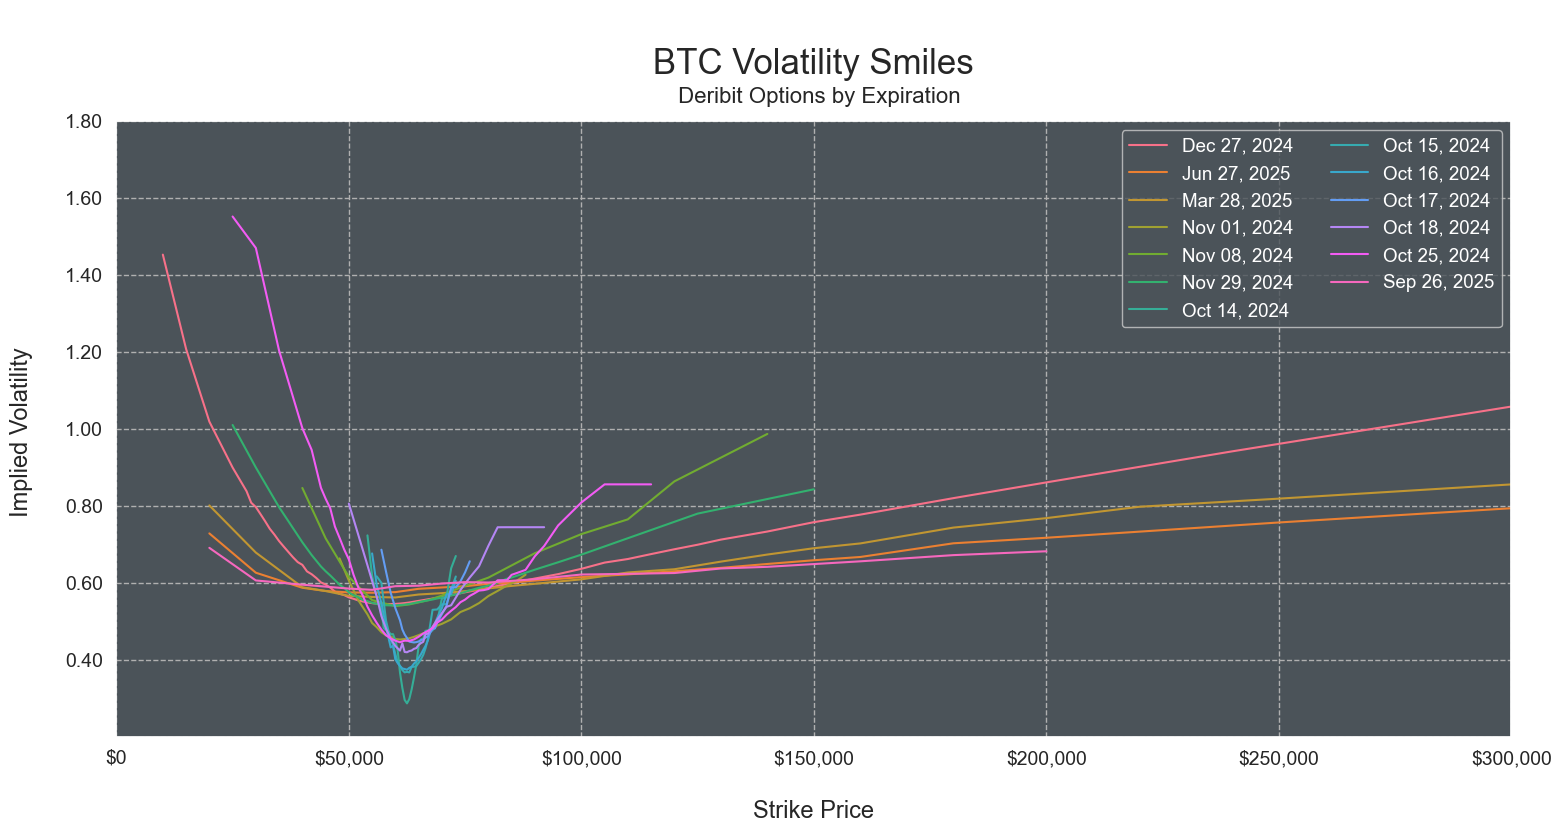

In [28]:
l = sns.lineplot(data=calls, x="strike", y="iv_mark", hue='expiration')
l.set_xlabel("\nStrike Price", fontsize = 17)
l.set_ylabel("Implied Volatility \n", fontsize = 17)
l.set_xlim([0, calls['strike'].max()])

l.set_xticks(l.get_xticks().tolist())
l.set_xticklabels(['${:,.0f}'.format(x) for x in l.get_xticks().tolist()],fontsize=14)
l.set_yticks(l.get_yticks().tolist())
l.set_yticklabels(['{:.2f}'.format(y) for y in l.get_yticks().tolist()],fontsize=14)
plt.setp(l.get_yticklabels()[0], visible=False)    
leg = plt.legend(loc='upper right',ncol=2,fontsize=13.5)
for text in leg.get_texts():
    text.set_color("white")
l.set_title('\n' + asset.upper() + ' Volatility Smiles\n', fontsize = 25)
plt.suptitle('\n\n         Deribit Options by Expiration',fontsize=16);

# Plotting Calls vs. Puts by Open Interest

In [29]:
options_oi = client.get_market_open_interest(
    markets='deribit-*-option',
    limit_per_market=1,
    paging_from='end',
    start_time=end_date,
    page_size=10000
).to_dataframe()

In [30]:
options_oi['value_usd'] = pd.to_numeric(options_oi['value_usd'])
options_oi = options_oi.loc[options_oi['value_usd'] > 0]

In [31]:
options_oi = options_oi.sort_values('value_usd',ascending=False)

In [32]:
oi_only = options_oi[['market','contract_count','value_usd']]

In [33]:
oi_only

,market,contract_count,value_usd
2472,deribit-XRP_USDC-25OCT24-1-C-option,6196000.0,3336546000.0
2466,deribit-XRP_USDC-25OCT24-0d8-C-option,4684000.0,2521865600.0
2464,deribit-XRP_USDC-25OCT24-0d75-C-option,1766000.0,950814400.0
2470,deribit-XRP_USDC-25OCT24-0d9-C-option,1731000.0,932143500.0
798,deribit-BTC-27DEC24-100000-C-option,9857.1,639750432.75
...,...,...,...
264,deribit-BNB_USDC-29NOV24-500-C-option,1.0,580.5411
207,deribit-BNB_USDC-25OCT24-360-P-option,1.0,580.5411
262,deribit-BNB_USDC-29NOV24-480-C-option,1.0,580.5396
180,deribit-BNB_USDC-18OCT24-610-C-option,1.0,580.5389


In [34]:
asset_deribit_oi = deribit_current[['market','expiration','strike','option_contract_type']]

In [35]:
oi_merged = pd.merge(asset_deribit_oi, oi_only, on="market").drop_duplicates()

In [36]:
oi_merged

,market,expiration,strike,option_contract_type,contract_count,value_usd
0,deribit-BTC-14OCT24-66000-P-option,2024-10-14T08:00:00.000000000Z,66000,put,0.4,25728.316
1,deribit-BTC-14OCT24-66000-C-option,2024-10-14T08:00:00.000000000Z,66000,call,29.2,1878176.12
2,deribit-BTC-14OCT24-65500-C-option,2024-10-14T08:00:00.000000000Z,65500,call,28.1,1807422.91
3,deribit-BTC-14OCT24-65000-C-option,2024-10-14T08:00:00.000000000Z,65000,call,58.5,3762784.35
4,deribit-BTC-14OCT24-64000-P-option,2024-10-14T08:00:00.000000000Z,64000,put,23.3,1498671.145
...,...,...,...,...,...,...
715,deribit-BTC-26SEP25-50000-C-option,2025-09-26T08:00:00.000000000Z,50000,call,0.5,32451.195
716,deribit-BTC-26SEP25-40000-P-option,2025-09-26T08:00:00.000000000Z,40000,put,35.6,2310525.084
717,deribit-BTC-26SEP25-30000-P-option,2025-09-26T08:00:00.000000000Z,30000,put,44.9,2914122.25
718,deribit-BTC-26SEP25-60000-C-option,2025-09-26T08:00:00.000000000Z,60000,call,3.3,214056.744


In [37]:
oi_merged.expiration = pd.to_datetime(oi_merged.expiration).dt.strftime('%b %d, %Y')
oi_merged

,market,expiration,strike,option_contract_type,contract_count,value_usd
0,deribit-BTC-14OCT24-66000-P-option,"Oct 14, 2024",66000,put,0.4,25728.316
1,deribit-BTC-14OCT24-66000-C-option,"Oct 14, 2024",66000,call,29.2,1878176.12
2,deribit-BTC-14OCT24-65500-C-option,"Oct 14, 2024",65500,call,28.1,1807422.91
3,deribit-BTC-14OCT24-65000-C-option,"Oct 14, 2024",65000,call,58.5,3762784.35
4,deribit-BTC-14OCT24-64000-P-option,"Oct 14, 2024",64000,put,23.3,1498671.145
...,...,...,...,...,...,...
715,deribit-BTC-26SEP25-50000-C-option,"Sep 26, 2025",50000,call,0.5,32451.195
716,deribit-BTC-26SEP25-40000-P-option,"Sep 26, 2025",40000,put,35.6,2310525.084
717,deribit-BTC-26SEP25-30000-P-option,"Sep 26, 2025",30000,put,44.9,2914122.25
718,deribit-BTC-26SEP25-60000-C-option,"Sep 26, 2025",60000,call,3.3,214056.744


In [38]:
oi_merged_sum = oi_merged.groupby(
        ['expiration', 'option_contract_type']).value_usd.sum().reset_index()

In [39]:
oi_merged_sum

,expiration,option_contract_type,value_usd
0,"Dec 27, 2024",call,3976075356.066
1,"Dec 27, 2024",put,1547475225.01
2,"Jun 27, 2025",call,257199454.401
3,"Jun 27, 2025",put,102482941.943
4,"Mar 28, 2025",call,1832745173.065
5,"Mar 28, 2025",put,377168731.527
6,"Nov 01, 2024",call,114413038.068
7,"Nov 01, 2024",put,95059169.425
8,"Nov 08, 2024",call,815723403.183
9,"Nov 08, 2024",put,474329954.222


In [40]:
calls_oi = pd.DataFrame(oi_merged_sum.loc[oi_merged_sum['option_contract_type'] == 'call'])
puts_oi = pd.DataFrame(oi_merged_sum.loc[oi_merged_sum['option_contract_type'] == 'put'])

In [41]:
# Convert 'expiration' to datetime and extract month
calls_oi['expiration'] = pd.to_datetime(calls_oi['expiration'])
calls_oi['Expiration Month'] = calls_oi['expiration'].dt.month

puts_oi['expiration'] = pd.to_datetime(puts_oi['expiration'])
puts_oi['Expiration Month'] = puts_oi['expiration'].dt.month

# Group by 'expiration_month' and sum 'value_usd'
calls_oi_grouped = calls_oi.groupby('Expiration Month')['value_usd'].sum()
puts_oi_grouped = puts_oi.groupby('Expiration Month')['value_usd'].sum()

# Convert Series to DataFrame and reset index
calls_oi_df = calls_oi_grouped.reset_index()
puts_oi_df = puts_oi_grouped.reset_index()

# Replace month numbers with month names
calls_oi_df['Expiration Month'] = calls_oi_df['Expiration Month'].apply(lambda x: calendar.month_name[x])
puts_oi_df['Expiration Month'] = puts_oi_df['Expiration Month'].apply(lambda x: calendar.month_name[x])

In [42]:
calls_oi_df

,Expiration Month,value_usd
0,March,1832745173.065
1,June,257199454.401
2,September,73607162.108
3,October,3062538484.935
4,November,1987511823.286
5,December,3976075356.066


2024-10-14 12:59:01 INFO     Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2024-10-14 12:59:01 INFO     Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


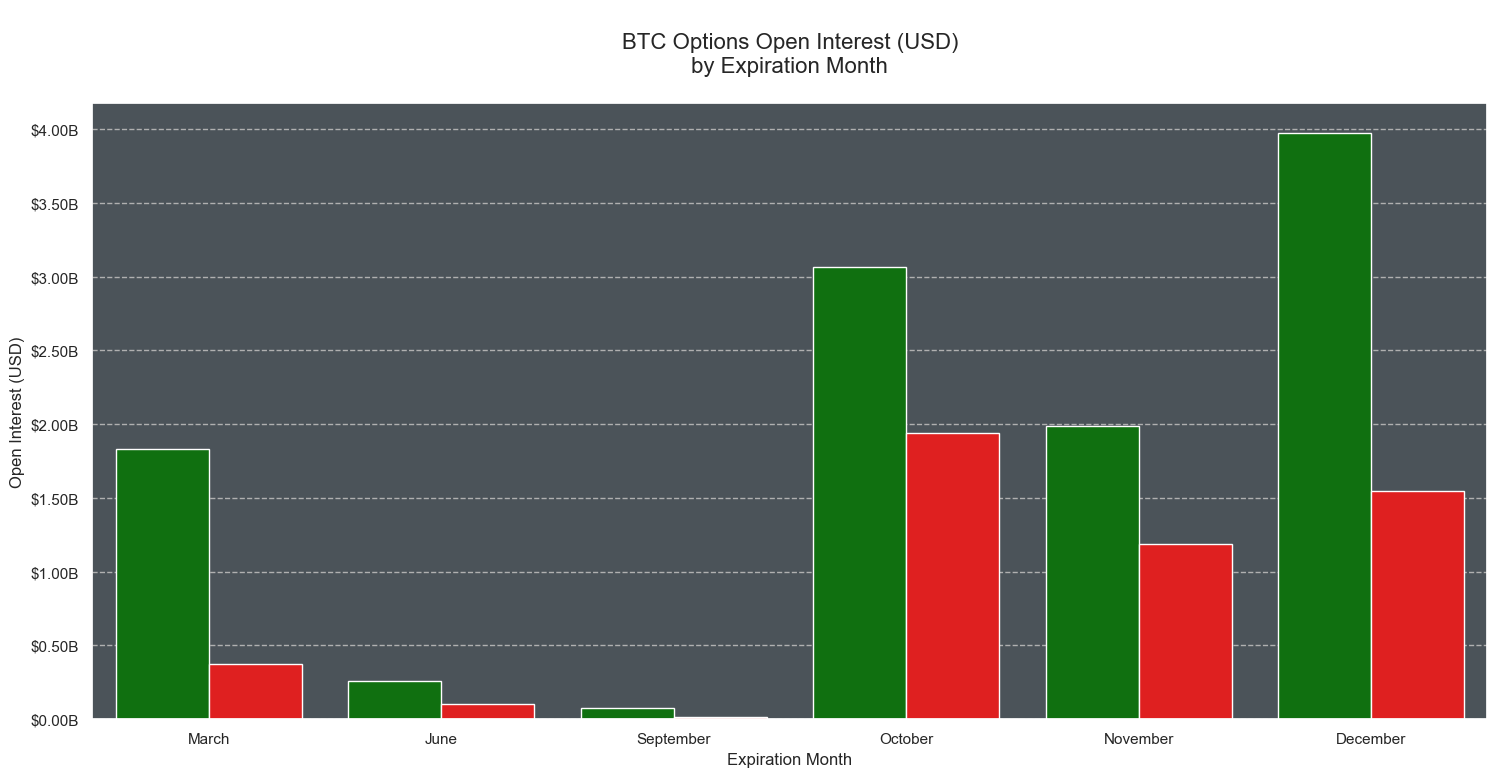

In [43]:
# Add a new column to distinguish between calls and puts
calls_oi_df['type'] = 'calls'
puts_oi_df['type'] = 'puts'

# Concatenate the dataframes
df = pd.concat([calls_oi_df, puts_oi_df])
df = df.rename(columns={"value_usd": "Open Interest (USD)"})

# Plot the bars side by side
p = sns.barplot(data=df, x='Expiration Month', y='Open Interest (USD)', hue='type', palette=['green', 'red'])
p.set_title('\nBTC Options Open Interest (USD)\nby Expiration Month\n',fontsize=16)
# Format y-axis in billions
fmt = '${x:,.0f}B'
p.legend_.remove()

tick = mtick.FuncFormatter(lambda x, pos: '${:,.2f}B'.format(x*1e-9))
p.yaxis.set_major_formatter(tick)